In [110]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import random
import matplotlib.pyplot as plt

In [2]:
root="D:\\Semester_6\\ell888\\A1\\BRATS2015_Training\\Data\\"

In [3]:
l=[]

In [163]:
for j in tqdm(range(1, 7)):
    s= np.load(root+"s_train"+str(j)+".npy")
    x = np.load(root+"x_train"+str(j)+".npy")
    for i in range(x.shape[0]):
        l.append((x[i, :, :], s[i]))    

In [164]:
random.shuffle(l)

In [165]:
l_x=[]
s_x=[]

In [166]:
for image, label in tqdm(l) :
    l_x.append(image)
    s_x.append(label)


In [167]:
x_train= np.asarray(l_x)
s_train= np.asarray(s_x)

In [168]:
x_pca = np.reshape(x_train, (x_train.shape[0], -1))

In [169]:
s_train= np.reshape(s_train, (-1, 1))

In [170]:
from sklearn.decomposition import PCA

In [171]:
pca= PCA(n_components=2)

In [172]:
def make_batches(X_train, Y_train, batch_size=8217):
    m= X_train.shape[0]
    print(m)
    num_batches=0
    batch_list=[]
    if m%batch_size==0:
        num_batches=(int)(m/batch_size)
    else:
        num_batches=int(int(m)/int(batch_size))+1
    for i in range(0,int(num_batches)):
        start_index= i*batch_size
        if i==num_batches-1:
            end_index=m
        else :
            end_index=(i+1)*batch_size
        X_temp= X_train[start_index:end_index, :]
        Y_temp= Y_train[start_index:end_index, :]
        batch_list.append((X_temp, Y_temp))
    np.random.shuffle(batch_list)
    return batch_list

In [173]:
batch_list= make_batches(x_pca, s_train)
len(batch_list)

32868


4

In [174]:
batch_x=[]
for x_train, s_train in tqdm(batch_list):
    x_train = pca.fit_transform(x_train)
    batch_x.append((x_train, s_train))

In [175]:
x1, s1 = batch_x[0]
x2, s2 = batch_x[1]

In [176]:
np.save('x1_pca2.npy', x1)
np.save('s1_pca2.npy', s1)
np.save('x2_pca2.npy', x2)
np.save('s2_pca2.npy', s2)

In [177]:
x_net = np.concatenate((x1, x2))
s_net = np.concatenate((s1, s2))

In [178]:
print(x_net.shape)
print(s_net.shape)

(16434, 2)
(16434, 1)


In [179]:
np.save('x_net_pca2.npy', x_net)
np.save('s_net_pca2.npy', s_net)

In [188]:
def pcaVisualize2d(x,s):
    plt.figure()
   # print(x.shape)
   # print(x[:,0].shape)
   # print(x[:,1].shape)
    #ax = fig.add_subplot(1, projection = "1d")
    plt.scatter(x[:,0],x[:,1],c=s[:,0], marker = ".")
    #plt.show()    

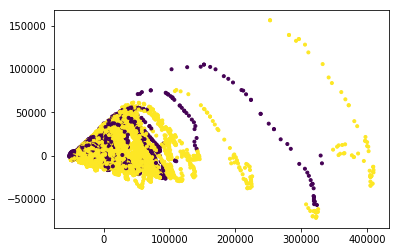

In [189]:
pcaVisualize2d(x_net,s_net)    

In [190]:
from sklearn import svm

In [191]:
x_net = np.load("x_net_pca2.npy")

In [192]:
clf= svm.SVC()


In [193]:
from sklearn.model_selection import train_test_split

In [194]:
x_train, x_validate, y_train, y_validate = train_test_split(x_net, s_net, test_size=0.3, random_state=42)

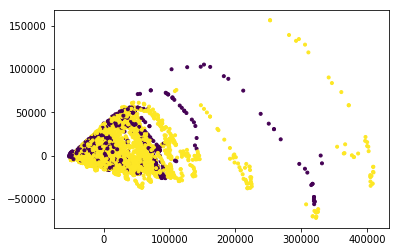

In [195]:
pcaVisualize2d(x_train,y_train)    

In [196]:
x_validate.shape

(4931, 2)

In [197]:
clf.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
#clf.score(x_validate, y_validate)  #for pca=10

0.81829243561143783

In [76]:
#clf.score(x_validate, y_validate)  #for pca=9

0.82863516528087611

In [111]:
#clf.score(x_validate, y_validate)  #for pca=8

0.83208274183735553

In [92]:
#clf.score(x_validate, y_validate)  #for pca=1

0.83776110322449804

In [198]:
clf.score(x_validate, y_validate)  #for pca=2

0.86006895153112961

In [28]:
clf.score(x_validate, y_validate)  #for pca=12

0.83147434597444736

In [49]:
clf.score(x_validate, y_validate)  #for pca=13

0.83147434597444736

In [73]:
clf.score(x_validate, y_validate)  #for pca=14

0.83350233218414116

In [96]:
clf.score(x_validate, y_validate)  #for pca=15

0.83350233218414116

In [53]:
#clf.score(x_validate, y_validate)  #for pca=11

0.818900831474346

In [112]:
clf.score(x_train, y_train)

1.0